### 特徵選擇和PCA的差別是什麼?

1. 特徵選擇是從已知的特徵中去篩選，且篩選後的特徵仍然具有可讀性。
2. PCA是將已存在的特徵進行壓縮，因此新的特徵不具有可讀性。

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [12]:
iris = load_iris()
y = iris.target
x = iris.data

x.shape         #2維數組

(150, 4)

In [13]:
import pandas as pd

pd.DataFrame(x)     #x作為特徵矩陣是4維

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
#調用PCA

pca = PCA(n_components=2)
pca = pca.fit(x)
x_dr = pca.transform(x)

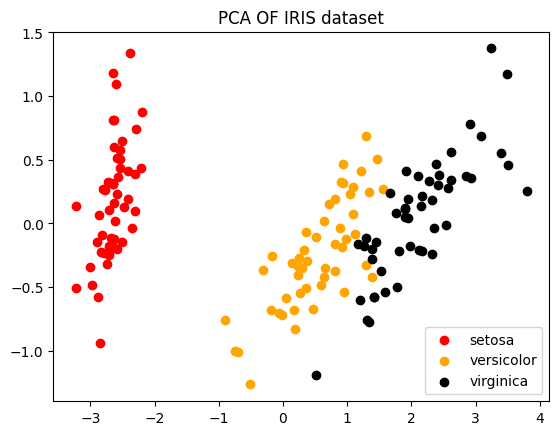

In [15]:
# 取出那些 y=0 (即iris.target) 的 x_dr

plt.figure()

# scatter 為散點圖 (x軸,y軸,顏色,這組點的名稱)
plt.scatter(x_dr[y==0,0],x_dr[y==0,1],c="red",label=iris.target_names[0])
plt.scatter(x_dr[y==1,0],x_dr[y==1,1],c="orange",label=iris.target_names[1])
plt.scatter(x_dr[y==2,0],x_dr[y==2,1],c="black",label=iris.target_names[2])
plt.legend()        #顯示圖例 (iris.target 對應的顏色)
plt.title("PCA OF IRIS dataset")
plt.show()

In [16]:
pca.explained_variance_ratio_   #降維後各特徵佔比

array([0.92461872, 0.05306648])

In [17]:
pca.explained_variance_ratio_.sum() #可用於判斷降維後特徵的丟失量

0.977685206318795

### 人臉辨識看PCA降維

In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [8]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape
# 1348  圖像的個數
# 62    是圖像特徵矩陣的行
# 47    是圖像特徵矩陣的列

x = faces.data


### 圖像數據的可視化(常用)

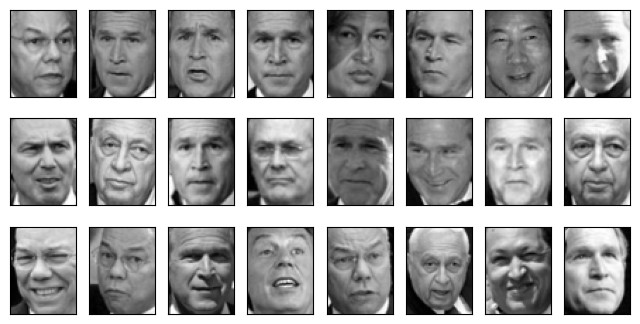

In [7]:
fig, axes = plt.subplots(3,8
                         ,figsize=(8,4)
                         ,subplot_kw={"xticks":[],"yticks":[]})     #不要顯示座標軸

# axes 對應的是一個fig中的空格
# imshow 將圖像填入空白畫布
# axes[0][0].imshow(faces.images[0,:,:]) 代表 faces.images[i,:,:] 填入 axes
# axes.flat 將axes二維陣列拉成一維
# enumerate 給予一維陣列索引

#填充圖像
for i,ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:]
              ,cmap="gray"
              )




In [10]:
#原本 62*47維 降成 150維

pca = PCA(150).fit(x)

V = pca.components_
V.shape

(150, 2914)

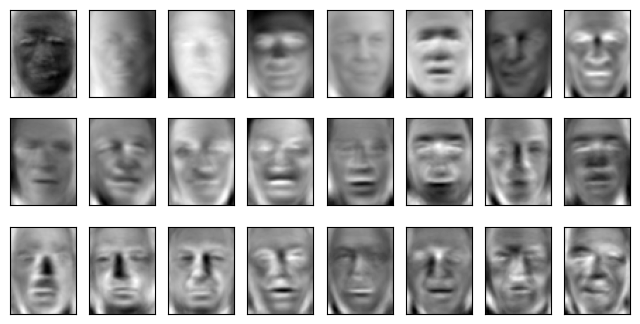

In [12]:
#新特徵矩陣的可視化

fig, axes = plt.subplots(3,8
                         ,figsize=(8,4)
                         ,subplot_kw={"xticks":[],"yticks":[]}) 

for i,ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47)     #將 V(150,2914) reshape成 V(150,62,47)
              ,cmap="gray"
              )
    
#可由上下兩張圖可知 PCA 降維保存的核心特徵為五官和光影


### 用 PCA 做噪音過濾

In [13]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [14]:
digits = load_digits()
digits.data.shape

(1797, 64)

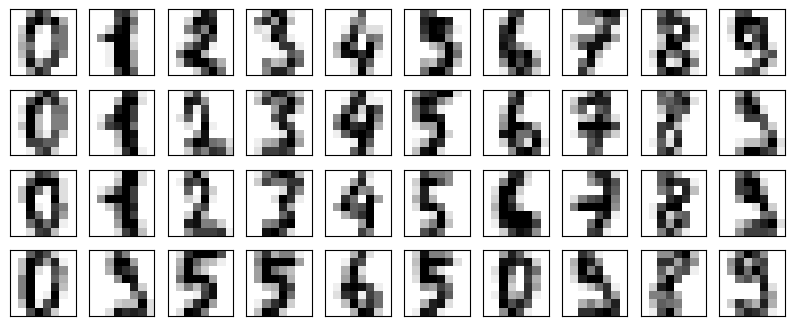

In [22]:
def plot_digits(data):              #定義 可視化 function
    fig,axes = plt.subplots(4,10
                            ,figsize=(10,4)
                            ,subplot_kw={"xticks":[],"yticks":[]}
                            )
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")

plot_digits(digits.data)

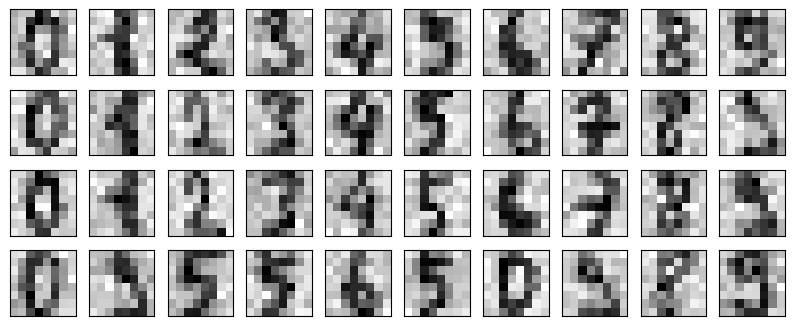

In [33]:
# 補上噪音

np.random.RandomState(42)

noisy = np.random.normal(digits.data,2)

plot_digits(noisy)

In [36]:
#降噪

pca = PCA(0.5,svd_solver="full").fit(noisy)
x_dr = pca.transform(noisy)
x_dr.shape

(1797, 6)

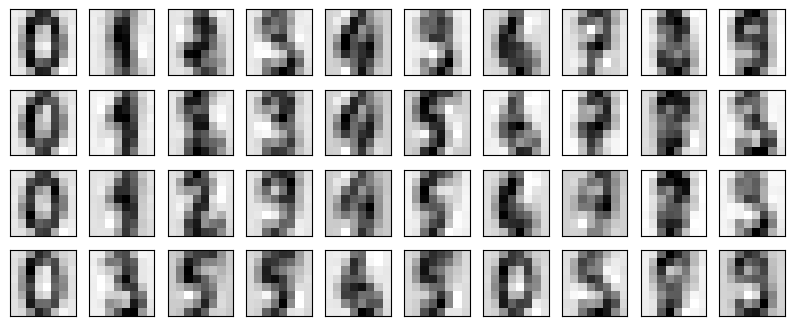

In [37]:
# reverse result
# x_dr 不能直接丟入 plot_digits ，因為不是 8*8

without_noise = pca.inverse_transform(x_dr)

plot_digits(without_noise)